<a href="https://colab.research.google.com/github/agulhane090398/PythonViz/blob/main/NN_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Download the dataset
!gdown 1dLOPwh01o3k8p_hK633ixhD1ehz6nNWk

# Load into a DataFrame
df = pd.read_csv("/content/spiral.csv")
df.head()

Downloading...
From: https://drive.google.com/uc?id=1dLOPwh01o3k8p_hK633ixhD1ehz6nNWk
To: /content/spiral.csv
100% 12.9k/12.9k [00:00<00:00, 28.1MB/s]


,x1,x2,y
0,0.000000,0.000000,0
1,-0.000650,0.010080,0
2,0.009809,0.017661,0
3,0.007487,0.029364,0
4,-0.000027,0.040404,0


In [ ]:
# Separating feature and label columns
X = df.iloc[:, :-1].to_numpy()
y = df.iloc[:, -1].to_numpy()

In [ ]:
#features
# Get dimensions
d = X.shape[1] # Number of features (Input size = 2)
n = len(np.unique(y)) # Number of classes (Output size = 3)
m = X.shape[0] # Number of samples (300)s

In [ ]:
d, n, m

(2, 3, 300)

In [ ]:
# Initialize parameters randomly
W = 0.01 * np.random.randn(d, n)
b = np.zeros((1, n))

In [ ]:
# Compute scores for a linear classifier
z = np.dot(X, W) + b
print(z.shape)

(300, 3)


In [ ]:
exp_z = np.exp(z)
probs = exp_z / np.sum(exp_z, axis=1, keepdims=True)

In [ ]:
probs

array([[0.33333333, 0.33333333, 0.33333333],
       [0.33332648, 0.33336102, 0.3333125 ],
       [0.33333732, 0.33340483, 0.33325786],
       [0.33332706, 0.33343369, 0.33323925],
       [0.33330961, 0.33344975, 0.33324065],
       [0.33331487, 0.3334929 , 0.33319223],
       [0.33334705, 0.33354828, 0.33310467],
       [0.33333063, 0.33357621, 0.33309316],
       [0.33331025, 0.33359526, 0.33309448],
       [0.33334221, 0.33365196, 0.33300583],
       [0.3333217 , 0.33367519, 0.33300311],
       [0.33332257, 0.33371082, 0.33296661],
       [0.33332833, 0.33374954, 0.33292213],
       [0.33330222, 0.33376498, 0.33293279],
       [0.33334867, 0.33382968, 0.33282166],
       [0.33339197, 0.33387365, 0.33273438],
       [0.33339329, 0.33390966, 0.33269705],
       [0.33343029, 0.33394126, 0.33262845],
       [0.33339752, 0.33398162, 0.33262087],
       [0.33347336, 0.33399881, 0.33252783],
       [0.33349439, 0.3340247 , 0.33248091],
       [0.33341338, 0.33408984, 0.33249678],
       [0.

In [ ]:
def loss(y, probs):
    m = y.shape[0]
    # Advanced Indexing
    correct_logprobs = -np.log(probs[range(m), y])
    return np.sum(correct_logprobs)/m

loss(y, probs)

np.float64(1.0959560340433343)

In [ ]:
# dZ calculation
dz = probs.copy() # Start with probabilities
dz[range(m), y] -= 1 # Subtract 1 from the correct class column
dz = dz / m # Normalize by number of samples

In [ ]:
dz

array([[-0.00222222,  0.00111111,  0.00111111],
       [-0.00222225,  0.0011112 ,  0.00111104],
       [-0.00222221,  0.00111135,  0.00111086],
       [-0.00222224,  0.00111145,  0.0011108 ],
       [-0.0022223 ,  0.0011115 ,  0.0011108 ],
       [-0.00222228,  0.00111164,  0.00111064],
       [-0.00222218,  0.00111183,  0.00111035],
       [-0.00222223,  0.00111192,  0.00111031],
       [-0.0022223 ,  0.00111198,  0.00111031],
       [-0.00222219,  0.00111217,  0.00111002],
       [-0.00222226,  0.00111225,  0.00111001],
       [-0.00222226,  0.00111237,  0.00110989],
       [-0.00222224,  0.0011125 ,  0.00110974],
       [-0.00222233,  0.00111255,  0.00110978],
       [-0.00222217,  0.00111277,  0.00110941],
       [-0.00222203,  0.00111291,  0.00110911],
       [-0.00222202,  0.00111303,  0.00110899],
       [-0.0022219 ,  0.00111314,  0.00110876],
       [-0.00222201,  0.00111327,  0.00110874],
       [-0.00222176,  0.00111333,  0.00110843],
       [-0.00222169,  0.00111342,  0.001

In [ ]:
# dW = X^T dot dZ
dW = np.dot(X.T, dz)

# db = Sum of dZ
db = np.sum(dz, axis=0, keepdims=True)

In [ ]:
# Parameter Update
lr = 0.1
W += -lr * dW
b += -lr * db

In [ ]:
max_iters = 500
lr = 1 # Learning rate

loss_history = []

for i in range(max_iters):
    # 1. Forward Pass
    z = np.dot(X, W) + b
    exp_z = np.exp(z)
    probs = exp_z / np.sum(exp_z, axis=1, keepdims=True)

    # 2. Compute Loss (for monitoring)
    error = -np.log(probs[range(m), y])
    loss = np.sum(error)/m
    loss_history.append(loss)

    if i % 10 == 0:
        print(f"iteration: {i}, loss: {loss}")

    # 3. Backward Pass (Gradient Calculation)
    dZ = probs.copy()
    dZ[range(m),y] -= 1
    dZ = dZ/m

    dW = np.dot(X.T, dZ)
    db = np.sum(dZ, axis=0, keepdims=True)

    # 4. Parameter Update
    W += -lr * dW
    b += -lr * db

iteration: 0, loss: 1.0983244371839973
iteration: 10, loss: 0.9006988397915512
iteration: 20, loss: 0.8263854816305445
iteration: 30, loss: 0.7919310035221532
iteration: 40, loss: 0.7735069934801801
iteration: 50, loss: 0.7626794118684592
iteration: 60, loss: 0.7558869279795004
iteration: 70, loss: 0.7514200376067214
iteration: 80, loss: 0.7483769490378137
iteration: 90, loss: 0.7462467174483852
iteration: 100, loss: 0.7447232854672736
iteration: 110, loss: 0.7436150112390186
iteration: 120, loss: 0.7427974951191213
iteration: 130, loss: 0.7421875537991156
iteration: 140, loss: 0.7417281721172901
iteration: 150, loss: 0.7413794508480652
iteration: 160, loss: 0.7411129738629415
iteration: 170, loss: 0.7409081989798907
iteration: 180, loss: 0.7407500857835976
iteration: 190, loss: 0.7406275012869966
iteration: 200, loss: 0.7405321271530432
iteration: 210, loss: 0.7404576976327737
iteration: 220, loss: 0.7403994599634193
iteration: 230, loss: 0.7403537871030669
iteration: 240, loss: 0.740

In [ ]:
W

array([[ 1.39735538,  1.00747071, -2.39961421],
       [-2.91848703,  3.31730658, -0.41096001]])

In [ ]:
b

array([[-0.05205391, -0.02392462,  0.07597853]])

In [ ]:
def predict(X):
    Z = np.dot(X, W) + b
    Z_e = np.exp(Z)
    probs = Z_e/np.sum(Z_e, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

print(f"Training Accuracy {np.sum(predict(X) == y)/m}")

Training Accuracy 0.5266666666666666


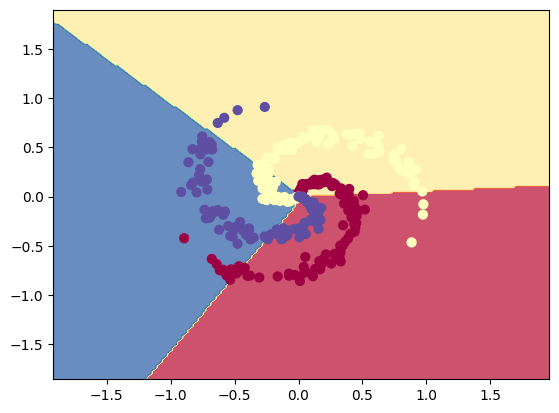

In [ ]:
# create a 2D grid
step = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

# predict for all the points in the grid
y_hat = predict(np.c_[xx.ravel(), yy.ravel()]) # concatenates along second axis
y_hat = y_hat.reshape(xx.shape)

# plot
fig = plt.figure()
plt.contourf(xx, yy, y_hat, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()